In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')

In [3]:
df.head().transpose()

,0,1,2,3,4
destination,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place,No Urgent Place
passanger,Alone,Friend(s),Friend(s),Friend(s),Friend(s)
weather,Sunny,Sunny,Sunny,Sunny,Sunny
temperature,55,80,80,80,80
time,2PM,10AM,10AM,2PM,2PM
coupon,Restaurant(<20),Coffee House,Carry out & Take away,Coffee House,Coffee House
expiration,1d,2h,2h,2h,1d
gender,Female,Female,Female,Female,Female
age,21,21,21,21,21
maritalStatus,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner,Unmarried partner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
null = df.isnull().sum()/len(df)
null_values = null[null>0].sort_values(ascending=False)
null_values

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
dtype: float64

I think the first thing we can say is that with over 99% of the values for `car` missing, we can drop that column.  It is interesting to note that the data descriptions provided do not even identify what this column means.  

For our other values we will have to look a little deeper at the columns, and see if there is any way to impute values that makes sense. 

In [6]:
df = df.drop('car', axis=1)

### Missing Data
These columns describes how many times per month the individual being offered the coupon:
 - CoffeeHouse:  Goes to a Coffee House
 - CarryAway:  Gets Carry-Out food
 - Bar:  Goes to a Bar
 - Restaurant20To50:  Goes to a restaurant where the price per person is \\$20 to \\$50
 - RestaurantLessThan20:  Goes to a restaurant where the price per person is less than \\$20

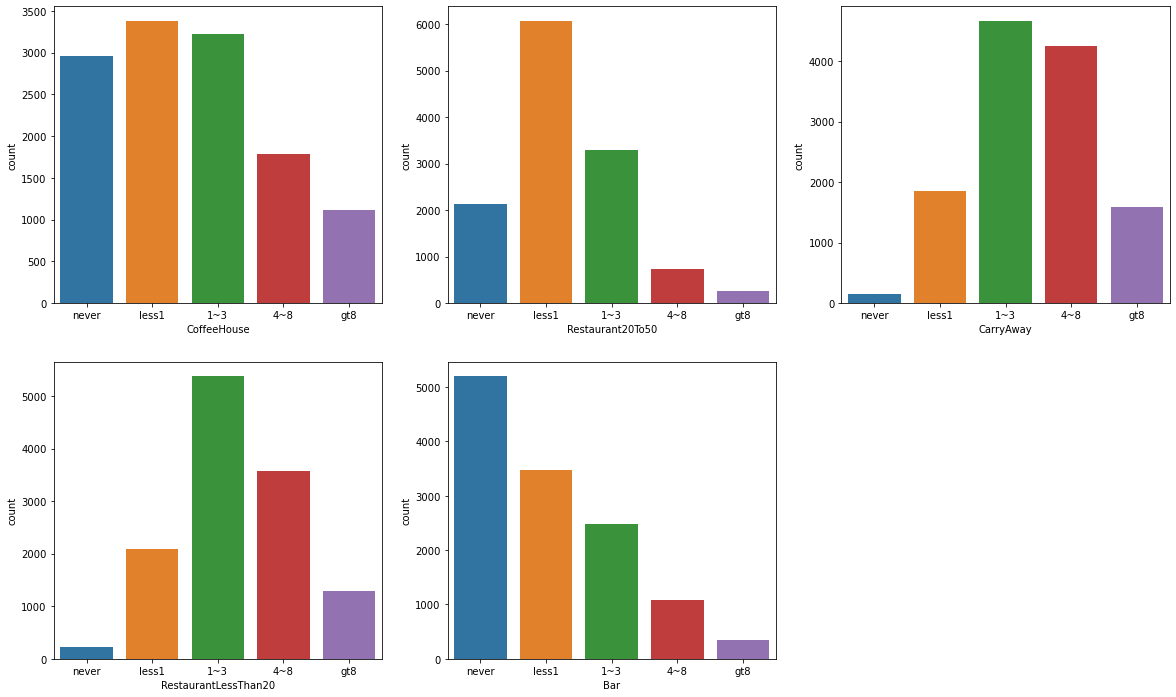

In [7]:
null = df.isnull().sum()/len(df)
null_values = null[null>0].sort_values(ascending=False)

i, j = 0, 0
plots_per_row = 3
fig, axs = plt.subplots(2,3, figsize=(20, 12))
order = ['never', 'less1', '1~3', '4~8', 'gt8']

for item in list(null_values.index):
    sns.countplot(x=item, data=df, ax=axs[i][j], order=order)
    axs[i][j].set_xlabel(item)
    j += 1
    if j % plots_per_row == 0:
        i += 1
        j = 0
axs[1][2].set_axis_off()
plt.show()

Since the coupons we are giving away are for Coffee Shops, Restaurants, and Bars; the amount of times per months people go to these places probably has a very high predictive value on whether or not they will accept the coupon.  In order not to taint our data at all, it doesn't make a lot of sense to just try to impute or assign values. 

Let's see how many rows total we would have to drop in order to just get rid of all missing values.

In [8]:
print('Number of rows to drop: {}'.format(len(df)- len(df.dropna())))
print('Percent of rows to drop: {}'.format(round((len(df)- len(df.dropna()))/len(df),2)))

Number of rows to drop: 605
Percent of rows to drop: 0.05


In [9]:
df = df.dropna()

So, if we were to drop all rows with missing values, we'd lose about 5% of our dataset.  Overall, I think that is not too bad.

## Reviewing Our Data
As a quick summary, I will take a look at what I think are some of the more interesting relationships in our dataset.  A comparison of every variable in our dataset to the Target Variable is included in Appendix 1.

We'll start out by taking a look at the distribution of our Target Variable.

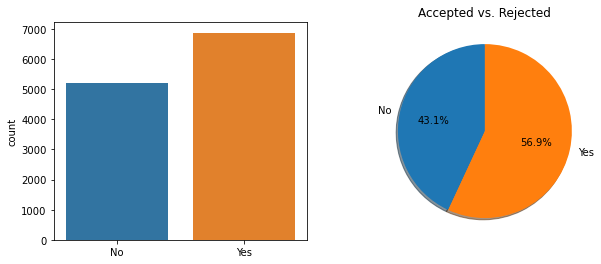

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x='Y', data=df, ax=axs[0])
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].set_xlabel('')
axs[1].pie(df.groupby('Y').size(), labels=['No', 'Yes'], autopct='%1.1f%%', shadow=True, startangle=90)
axs[1].set_title('Accepted vs. Rejected')
plt.show()

Other data analysis here.

### Treating Categorical Data
This dataset is comprised entirely of categorical data. Even the data types that are `int64` are actually categorical.  Let's take a quick look at all the different types of categorical data.  Our Machine Learning algorithms will generally only accept numerical data, so we'll have to do some transformations on the data.  Since we want to do a logistic regression, it is best to either use ordinal or dummy encoding.

### Label Encoding Data
We'd generally want to use label encoding when there is an ordinal reletionship between our categories.  Several of our categories really fit this description.
- Age
- Income
- Education
- Expiration of Coupon
- Bar
- CarryAway
- CoffeeHouse
- RestaurantLessThan20
- Restaurant20To50

In [11]:
age_map = {'below21': 0, '21': 1, '26': 2, '31': 3, '36': 4, '41': 5, '46': 6, '50plus': 7}
income_map = {'Less than $12500': 0,  '$12500 - $24999': 1, '$25000 - $37499': 2, '$37500 - $49999': 3,
              '$50000 - $62499': 4, '$62500 - $74999': 5, '$75000 - $87499': 6, '$87500 - $99999': 7, 
              '$100000 or More': 8}
education_map = {'Some High School':0, 'High School Graduate':1, 'Some college - no degree':2, 'Associates degree':3, 
                 'Bachelors degree':4, 'Graduate degree (Masters or Doctorate)':5}
expiration_map = {'2h': 0, '1d':1}
consumption_map = {'never':0, 'less1':1, '1~3':2, '4~8':3, 'gt8':4}

df['age'] = df['age'].map(age_map)
df['income'] = df['income'].map(income_map)
df['education'] = df['education'].map(education_map)
df['expiration'] = df['expiration'].map(expiration_map)
df['Bar'] = df['Bar'].map(consumption_map)
df['CarryAway'] = df['CarryAway'].map(consumption_map)
df['CoffeeHouse'] = df['CoffeeHouse'].map(consumption_map)
df['RestaurantLessThan20'] = df['RestaurantLessThan20'].map(consumption_map)
df['Restaurant20To50'] = df['Restaurant20To50'].map(consumption_map)

### Dummy Variable Encoding
Dummy variable encoding, much like one-hot encoding.... [describe here]
- Coupon Type
- Destination
- Passenger
- Weather
- Time*
- Gender
- Marital Status
- Occupation

\* Even though time is linear, it makes more sense to use dummy encoding.  If we assumed label encoding for time, then our algorithm would impute the relationship that 7 AM < 10 AM < 2PM... etc.   Which may provide misleading results.

In [12]:
dummies = pd.get_dummies(df[['coupon', 'destination', 'passanger', 'weather', 'time', 'gender', 
                   'maritalStatus', 'occupation']], drop_first=True)

In [13]:
df = pd.concat([df, dummies], axis=1)
df = df.drop(['coupon', 'destination', 'passanger', 'weather', 'time', 'gender', 
              'maritalStatus', 'occupation'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   temperature                                           12079 non-null  int64
 1   expiration                                            12079 non-null  int64
 2   age                                                   12079 non-null  int64
 3   has_children                                          12079 non-null  int64
 4   education                                             12079 non-null  int64
 5   income                                                12079 non-null  int64
 6   Bar                                                   12079 non-null  int64
 7   CoffeeHouse                                           12079 non-null  int64
 8   CarryAway                                             12079 non-null  int64

In [15]:
df.to_csv('in-vehicle-coupon-recommendation_cleaned.csv')

# APPENDIX 1
## Graphing of All Categorical Variables

In [16]:
app_df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
app_df = app_df.drop('car', axis=1)
app_df = app_df.dropna()


#create unique data frame for each column
for col in app_df.columns.drop('Y'):    
    df_plot = app_df.groupby([col, 'Y']).size() / app_df.groupby(col).size()
    df_plot = df_plot.reset_index().pivot(columns='Y', index=col, values=0)
    vars()[col] = pd.DataFrame(df_plot)

In [17]:
# storing rejection percentage as variable
reject_pct = len(app_df[app_df['Y'] == 0]) / len(app_df)

### Coupon Information
First we'll look at the types of coupons and expiration periods of the coupons.

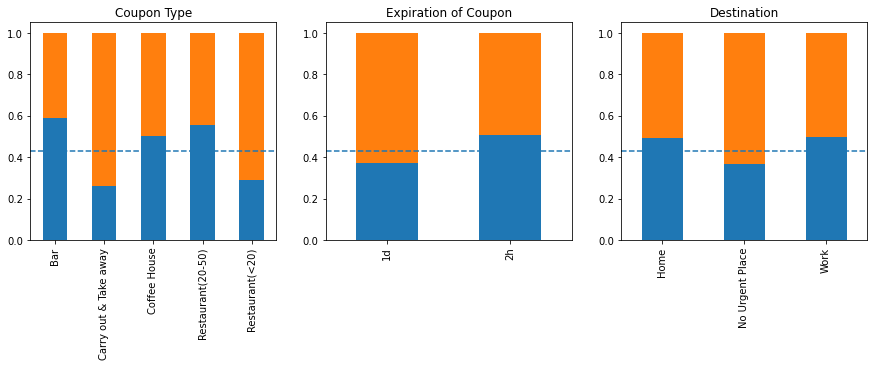

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))
coupon.plot(kind='bar', stacked=True, legend=False, title='Coupon Type', xlabel='', ax=axs[0])
axs[0].axhline(y=reject_pct, linestyle='--')
expiration.plot(kind='bar', stacked=True, legend=False, title='Expiration of Coupon', xlabel='', ax=axs[1])
axs[1].axhline(y=reject_pct, linestyle='--')
destination.plot(kind='bar', stacked=True, legend=False, title='Destination', xlabel='', ax=axs[2])
axs[2].axhline(y=reject_pct, linestyle='--')
plt.show()

### Environmental Factors
It appears below that...

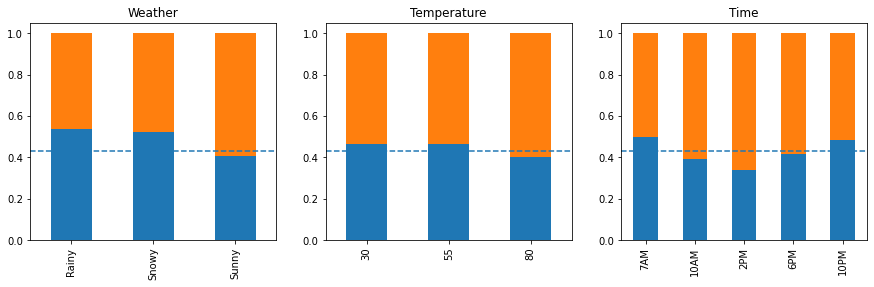

In [19]:
time = time.reindex(['7AM', '10AM', '2PM', '6PM', '10PM'])

fig, axs = plt.subplots(1, 3, figsize=(15,4))
weather.plot(kind='bar', stacked=True, legend=False, title='Weather', xlabel='', ax=axs[0])
axs[0].axhline(y=reject_pct, linestyle='--')
temperature.plot(kind='bar', stacked=True, legend=False, title='Temperature', xlabel='', ax=axs[1])
axs[1].axhline(y=reject_pct, linestyle='--')
time.plot(kind='bar', stacked=True, legend=False, title='Time', xlabel='', ax=axs[2])
axs[2].axhline(y=reject_pct, linestyle='--')
plt.show()

### Passenger Information

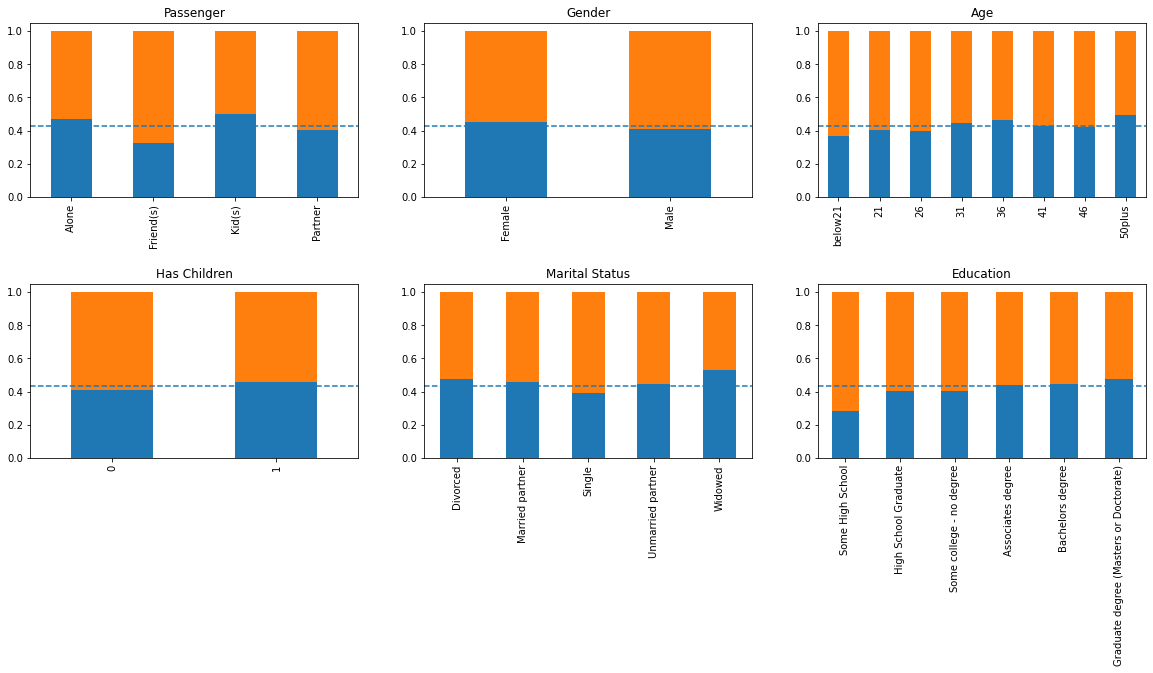

In [21]:
age = age.reindex(['below21', '21', '26', '31', '36', '41', '46','50plus'])
education = education.reindex(['Some High School', 'High School Graduate', 'Some college - no degree', 
                              'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)'])

fig, axs = plt.subplots(2, 3, figsize=(20,8))
passanger.plot(kind='bar', stacked=True, legend=False, title='Passenger', xlabel='', ax=axs[0][0])
axs[0][0].axhline(y=reject_pct, linestyle='--')
gender.plot(kind='bar', stacked=True, legend=False, title='Gender', xlabel='', ax=axs[0][1])
axs[0][1].axhline(y=reject_pct, linestyle='--')
age.plot(kind='bar', stacked=True, legend=False, title='Age', xlabel='', ax=axs[0][2])
axs[0][2].axhline(y=reject_pct, linestyle='--')
has_children.plot(kind='bar', stacked=True, legend=False, title='Has Children', xlabel='', ax=axs[1][0])
axs[1][0].axhline(y=reject_pct, linestyle='--')
maritalStatus.plot(kind='bar', stacked=True, legend=False, title='Marital Status', xlabel='', ax=axs[1][1])
axs[1][1].axhline(y=reject_pct, linestyle='--')
education.plot(kind='bar', stacked=True, legend=False, title='Education', xlabel='', ax=axs[1][2])
axs[1][2].axhline(y=reject_pct, linestyle='--')
fig.subplots_adjust(hspace=0.5)
plt.show()


### Occupation and Income Information
We can also take a look at occupation and income.  I think it is interesting that...

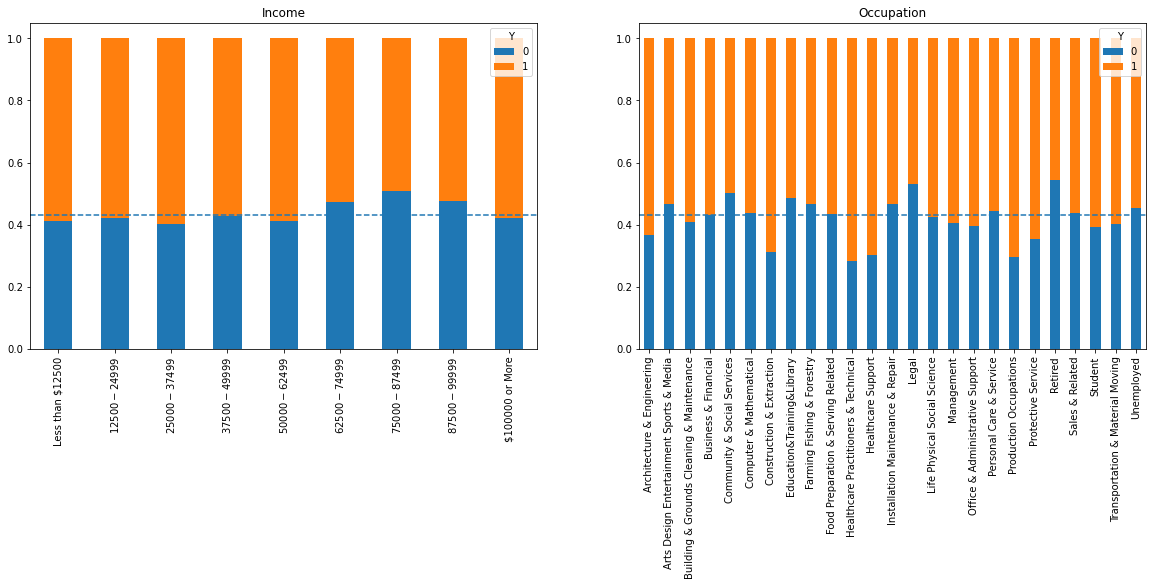

In [22]:
occupation = occupation.reindex(sorted(app_df['occupation'].unique()))
income = income.reindex(['Less than $12500',  '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', 
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
      
fig, axs = plt.subplots(1, 2, figsize=(20,6))
income.plot(kind='bar', stacked=True, legend=True, title='Income', xlabel='', ax=axs[0])
axs[0].axhline(y=reject_pct, linestyle='--')
occupation.plot(kind='bar', stacked=True, legend=True, title='Occupation', xlabel='', ax=axs[1])
axs[1].axhline(y=reject_pct, linestyle='--')
plt.show()

### Consumption of Services
We also have information about how often the consumer utilizes certain services that are being offered in coupons.

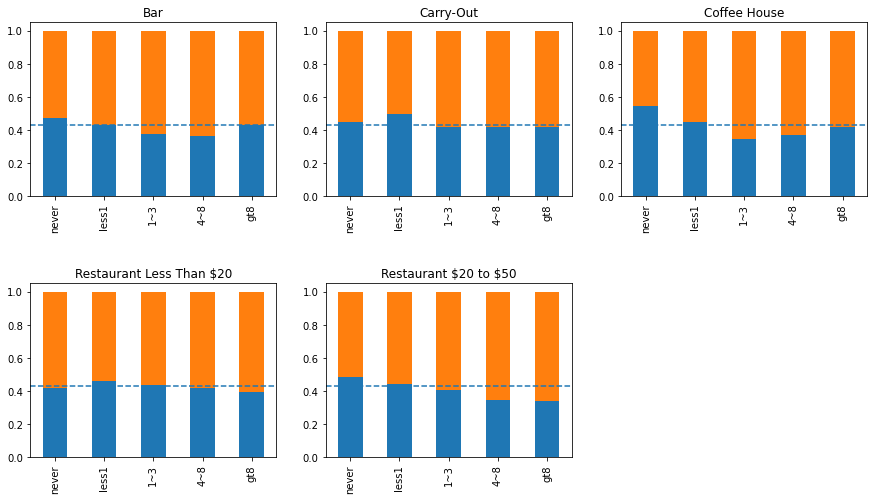

In [23]:
Bar = Bar.reindex(['never', 'less1', '1~3', '4~8', 'gt8'])
CarryAway = CarryAway.reindex(['never', 'less1', '1~3', '4~8', 'gt8'])
CoffeeHouse = CoffeeHouse.reindex(['never', 'less1', '1~3', '4~8', 'gt8'])
RestaurantLessThan20 = RestaurantLessThan20.reindex(['never', 'less1', '1~3', '4~8', 'gt8'])
Restaurant20To50 = Restaurant20To50.reindex(['never', 'less1', '1~3', '4~8', 'gt8'])

fig, axs = plt.subplots(2, 3, figsize=(15,8))
Bar.plot(kind='bar', stacked=True, legend=False, title='Bar', xlabel='', ax=axs[0][0])
axs[0][0].axhline(y=reject_pct, linestyle='--')
CarryAway.plot(kind='bar', stacked=True, legend=False, title='Carry-Out', xlabel='', ax=axs[0][1])
axs[0][1].axhline(y=reject_pct, linestyle='--')
CoffeeHouse.plot(kind='bar', stacked=True, legend=False, title='Coffee House', xlabel='', ax=axs[0][2])
axs[0][2].axhline(y=reject_pct, linestyle='--')
RestaurantLessThan20.plot(kind='bar', stacked=True, legend=False, title='Restaurant Less Than \\$20', xlabel='', ax=axs[1][0])
axs[1][0].axhline(y=reject_pct, linestyle='--')
Restaurant20To50.plot(kind='bar', stacked=True, legend=False, title='Restaurant \\$20 to \\$50', xlabel='', ax=axs[1][1])
axs[1][1].axhline(y=reject_pct, linestyle='--')
fig.subplots_adjust(hspace=0.5)
axs[1][2].set_axis_off()
plt.show()

# APPENDIX 2
## Data Dictionary

* destination: No Urgent Place, Home, Work
* passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
* weather: Sunny, Rainy, Snowy
* temperature:55, 80, 30
* time: 2PM, 10AM, 6PM, 7AM, 10PM
* coupon: Restaurant(\<\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\\$20-\\$50)
* expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
* gender: Female, Male
* age: 21, 46, 26, 31, 41, 50plus, 36, below21
* maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
* has_Children:1, 0
* education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
* occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
* income: \\$37500 \- \\$49999, \\$62500 \- \\$74999, \\$12500 \- \\$24999, \\$75000 \- \\$87499,
\\$50000 \- \\$62499, \\$25000 \- \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
* Bar: never, less1, 1\~3, gt8, nan4\~8 (feature meaning: how many times do you go to a bar every month?)
* CoffeeHouse: never, less1, 4\~8, 1\~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
* CarryAway:n4\~8, 1\~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
* RestaurantLessThan20: 4\~8, 1\~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)
* Restaurant20To50: 1\~3, less1, never, gt8, 4\~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?)
* toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
* toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
* direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* Y:1, 0 (whether the coupon is accepted)